<a href="https://colab.research.google.com/github/Cazzarooo/Treinando_Prophet/blob/main/Treinando_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [ ]:
# Carregar o dataset
df_inflacao = pd.read_csv('inflacao.csv')

In [ ]:
# Preparar os dados para o Prophet
df_prophet = df_inflacao[['referencia', 'ipca_variacao']].copy()
df_prophet.rename(columns={'referencia': 'ds', 'ipca_variacao': 'y'}, inplace=True)
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y-%m')
df_prophet.dropna(subset=['y'], inplace=True)

In [ ]:
# Criar e ajustar o modelo Prophet
model = Prophet()
model.fit(df_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7px3x8iu/90mcjxg5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7px3x8iu/e1e7mz09.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99832', 'data', 'file=/tmp/tmp7px3x8iu/90mcjxg5.json', 'init=/tmp/tmp7px3x8iu/e1e7mz09.json', 'output', 'file=/tmp/tmp7px3x8iu/prophet_modelg6kz1uo1/prophet_model-20240924231536.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:15:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:15:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Criar dataframe de previsão para os próximos 120 meses (10 anos)
future = model.make_future_dataframe(periods=120, freq='M')

In [ ]:
# Fazer as previsões
forecast = model.predict(future)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


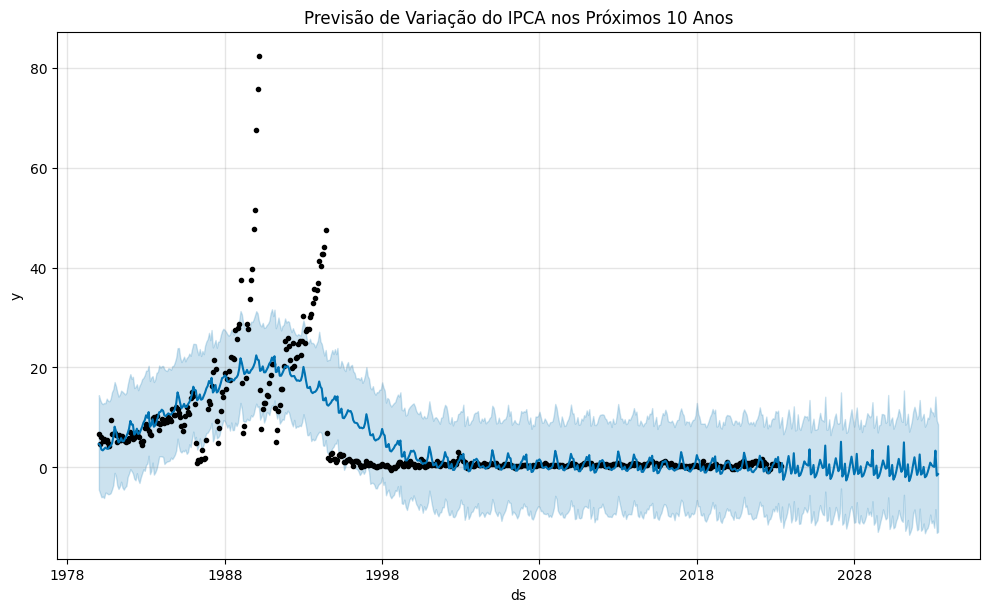

In [ ]:
# Plotar as previsões
model.plot(forecast)
plt.title("Previsão de Variação do IPCA nos Próximos 10 Anos")
plt.show()

In [ ]:
# Mostrar as previsões para os últimos 10 anos (120 meses)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(120))

            ds      yhat  yhat_lower  yhat_upper
521 2023-05-31  0.847041   -7.854294   10.044576
522 2023-06-30 -2.521759  -12.124944    6.619586
523 2023-07-31 -1.859279  -10.742163    7.256930
524 2023-08-31 -0.732864  -10.068369    8.199166
525 2023-09-30  0.805900   -9.020628    9.938033
..         ...       ...         ...         ...
636 2032-12-31  0.208639  -10.678997   10.979461
637 2033-01-31  0.073117  -12.114164   10.211594
638 2033-02-28  3.331303   -8.395309   14.151133
639 2033-03-31 -1.678731  -13.150511    9.353450
640 2033-04-30 -1.366694  -12.928591    8.600859

[120 rows x 4 columns]
